# Loading CSV Files

In [3]:
import os
import pandas as pd

# Set the directory where your CSV files are stored (relative to the notebooks directory)
data_dir = '../data/'

# Verify if the directory exists
if not os.path.exists(data_dir):
    print(f"Directory not found: {data_dir}. Please check the path.")
else:
    # Get a list of all CSV files in the directory
    files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

    # Check if any CSV files are found
    if not files:
        print("No CSV files found in the specified directory.")
    else:
        print(f"Files found: {files}")

        # Create an empty list to store the data
        data = []

        # Loop through each file and load the data
        for file in files:
            file_path = os.path.join(data_dir, file)  # Create the full file path
            try:
                df = pd.read_csv(file_path)

                # Check if the DataFrame is empty
                if df.empty:
                    print(f"Warning: {file} is empty or improperly formatted!")
                else:
                    data.append(df)
            except Exception as e:
                print(f"Error loading {file}: {e}")

        # After checking, combine the DataFrames
        if data:  # Check if there are any DataFrames in the list
            stock_data = pd.concat(data, ignore_index=True)
            print("Successfully loaded and concatenated CSV files.")
            print(stock_data.head())  # Display first few rows
        else:
            print("No valid data to concatenate.")


Files found: ['ADANIENT.csv', 'ADANIPORTS.csv', 'APOLLOHOSP.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DIVISLAB.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFCBANK.csv', 'HDFCLIFE.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFY.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'LTIM.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NIFTY 50.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBILIFE.csv', 'SBIN.csv', 'SUNPHARMA.csv', 'TATACONSUM.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'WIPRO.csv']
Successfully loaded and concatenated CSV files.
         Date      Open      High       Low     Close Adj Close   Volume  \
0  2002-07-01  1.364148    1.4017  1.334259  1.362615 -0.010443  1080397   
1  20

# Data Cleaning and Preprocessing

In [4]:
# Check for missing values in the dataset
print(stock_data.isnull().sum())

# Drop rows with missing values in critical columns (e.g., 'Close' and 'Date')
stock_data = stock_data.dropna(subset=['Close', 'Date'])

# Ensure 'Date' column is in datetime format (if it's not already)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Reset the index if necessary after cleaning
stock_data.reset_index(drop=True, inplace=True)

# Remove any outliers or invalid data points (optional, based on specific needs)
# Example: Remove any negative or zero values in the 'Close' column
stock_data = stock_data[stock_data['Close'] > 0]

# Verify data after cleaning
print(stock_data.info())
print(stock_data.describe())


Date                2
Open                1
High                1
Low                 1
Close               1
Adj Close           1
Volume              1
Price          293424
Adj Close.1    293425
Close.1        293425
High.1         293425
Low.1          293425
Open.1         293425
Volume.1       293425
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293424 entries, 0 to 293423
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         293424 non-null  datetime64[ns]
 1   Open         293424 non-null  object        
 2   High         293424 non-null  object        
 3   Low          293424 non-null  object        
 4   Close        293424 non-null  object        
 5   Adj Close    293424 non-null  object        
 6   Volume       293424 non-null  object        
 7   Price        0 non-null       object        
 8   Adj Close.1  0 non-null       object        
 9   Close.1      

# Exploratory Data Analysis (EDA)

count     293424.000000
unique    169119.000000
top          527.049988
freq        1705.000000
Name: Close, dtype: float64


C:\Users\Harsh Pandey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


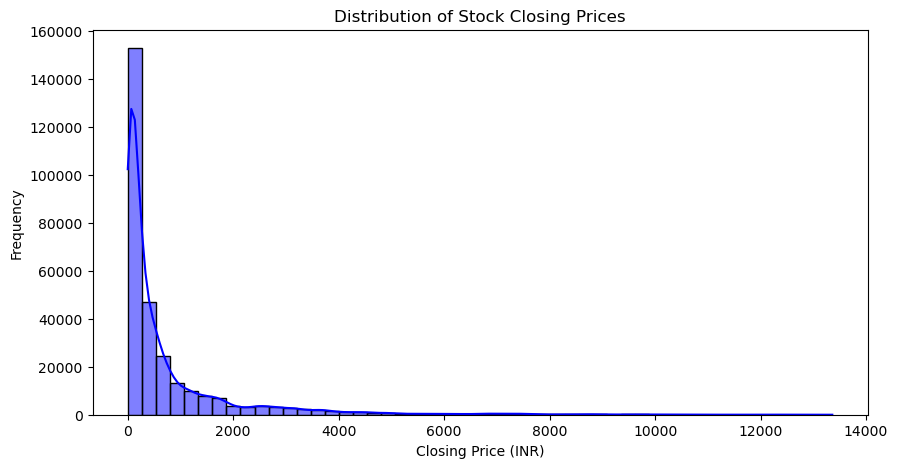

C:\Users\Harsh Pandey\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


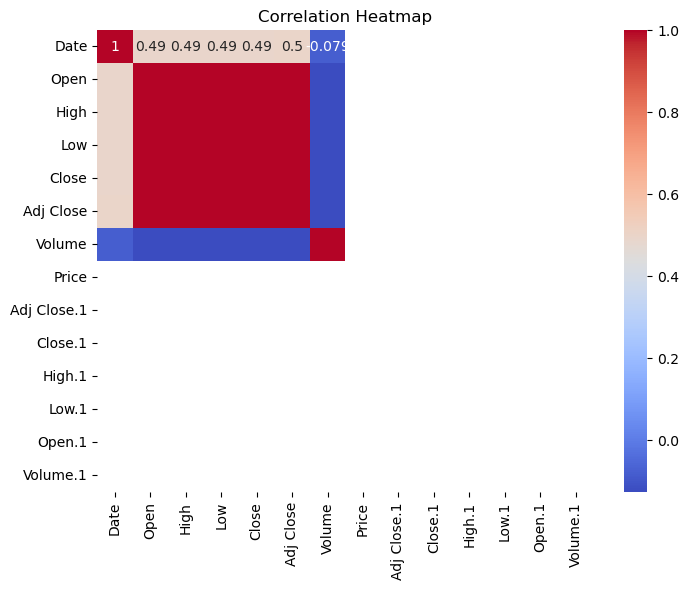

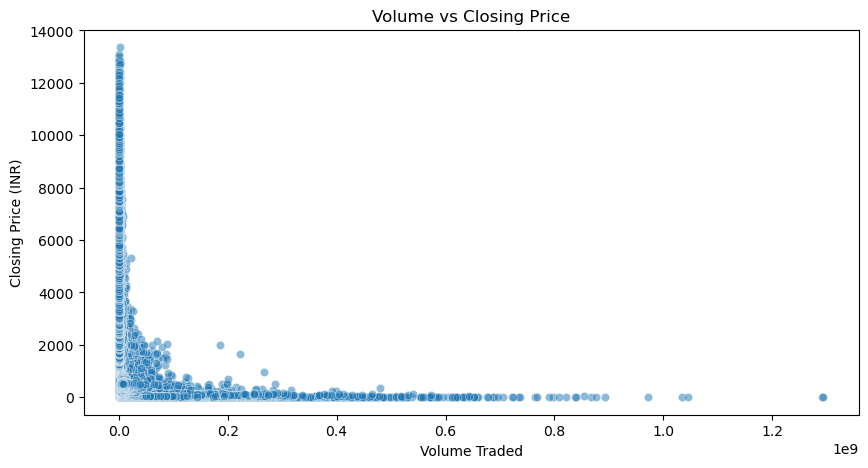

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Summary statistics for the 'Close' column
print(stock_data['Close'].describe())

# Plotting the distribution of closing prices
plt.figure(figsize=(10, 5))
sns.histplot(stock_data['Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Stock Closing Prices')
plt.xlabel('Closing Price (INR)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot relationship between volume traded and closing prices
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Volume', y='Close', data=stock_data, alpha=0.5)
plt.title('Volume vs Closing Price')
plt.xlabel('Volume Traded')
plt.ylabel('Closing Price (INR)')
plt.show()


# Time Series Analysis

In [6]:
import os
import pandas as pd

# Set the directory where your CSV files are stored (relative to the notebooks directory)
data_dir = '../data/'

# Verify if the directory exists
if not os.path.exists(data_dir):
    print(f"Directory not found: {data_dir}. Please check the path.")
else:
    # Get a list of all CSV files in the directory
    files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

    # Check if any CSV files are found
    if not files:
        print("No CSV files found in the specified directory.")
    else:
        print(f"Files found: {files}")

        # Create an empty list to store the data
        data = []

        # Loop through each file and load the data, adding the company name from the filename
        for file in files:
            file_path = os.path.join(data_dir, file)
            try:
                # Load the CSV file
                df = pd.read_csv(file_path)

                # Add a 'Company' column based on the filename (assuming company name is in the filename)
                company_name = file.split('.')[0]  # Remove the extension to get the company name
                df['Company'] = company_name

                # Check if the DataFrame is empty
                if df.empty:
                    print(f"Warning: {file} is empty or improperly formatted!")
                else:
                    data.append(df)
            except Exception as e:
                print(f"Error loading {file}: {e}")

        # After checking, combine the DataFrames
        if data:  # Check if there are any DataFrames in the list
            stock_data = pd.concat(data, ignore_index=True)
            print("Successfully loaded and concatenated CSV files.")
            print(stock_data.head())  # Display first few rows
        else:
            print("No valid data to concatenate.")


Files found: ['ADANIENT.csv', 'ADANIPORTS.csv', 'APOLLOHOSP.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DIVISLAB.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFCBANK.csv', 'HDFCLIFE.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFY.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'LTIM.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NIFTY 50.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBILIFE.csv', 'SBIN.csv', 'SUNPHARMA.csv', 'TATACONSUM.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'WIPRO.csv']
Successfully loaded and concatenated CSV files.
         Date      Open      High       Low     Close Adj Close   Volume  \
0  2002-07-01  1.364148    1.4017  1.334259  1.362615 -0.010443  1080397   
1  20

         Date      Open      High       Low     Close Adj Close   Volume  \
0  2002-07-01  1.364148    1.4017  1.334259  1.362615 -0.010443  1080397   
1  2002-07-02  1.386372  1.390971  1.356484  1.373344 -0.010525  1016147   
2  2002-07-03  1.371811  1.387139  1.364914  1.373344 -0.010525   980394   
3  2002-07-04  1.379475    1.4017  1.379475  1.381008 -0.010584   972747   
4  2002-07-05  1.388672  1.388672  1.372578  1.377942  -0.01056   974496   

    Company Price Adj Close.1 Close.1 High.1 Low.1 Open.1 Volume.1  
0  ADANIENT   NaN         NaN     NaN    NaN   NaN    NaN      NaN  
1  ADANIENT   NaN         NaN     NaN    NaN   NaN    NaN      NaN  
2  ADANIENT   NaN         NaN     NaN    NaN   NaN    NaN      NaN  
3  ADANIENT   NaN         NaN     NaN    NaN   NaN    NaN      NaN  
4  ADANIENT   NaN         NaN     NaN    NaN   NaN    NaN      NaN  


C:\Users\Harsh Pandey\AppData\Local\Temp\ipykernel_18792\2107365088.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Close'] = pd.to_numeric(company_data['Close'], errors='coerce')
C:\Users\Harsh Pandey\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harsh Pandey\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harsh Pandey\anaconda3\Lib\s

Mean Squared Error: 48.01


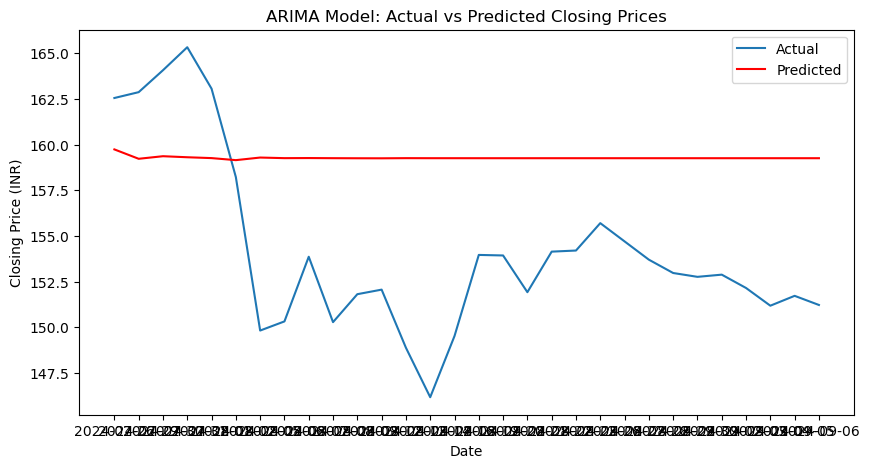

In [8]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming stock_data is the DataFrame with all the stock data
# Ensure that stock_data contains the 'Company' column and 'Date' is properly formatted

# Check if the stock_data DataFrame is available and structured correctly
print(stock_data.head())  # This should show the first few rows of the DataFrame, including 'Company' and 'Close'

# Select a specific company's stock data for analysis (e.g., 'TATASTEEL')
company_data = stock_data[stock_data['Company'] == 'TATASTEEL']

# Ensure the 'Close' column is numeric
company_data['Close'] = pd.to_numeric(company_data['Close'], errors='coerce')

# Drop rows with NaN values in 'Close' column
company_data = company_data.dropna(subset=['Close'])

# Sort the dataset by date to ensure proper time series order
company_data = company_data.sort_values('Date')

# Ensure 'Date' is set as the index
company_data.set_index('Date', inplace=True)

# Split the data into training and test sets (last 30 days as test)
train_data = company_data['Close'][:-30]
test_data = company_data['Close'][-30:]

# Build and fit the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # Adjust ARIMA order parameters as needed
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=30)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse:.2f}')

# Plot the actual vs predicted closing prices
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, color='red', label='Predicted')
plt.title('ARIMA Model: Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()


# Data Visualization

C:\Users\Harsh Pandey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Pandey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


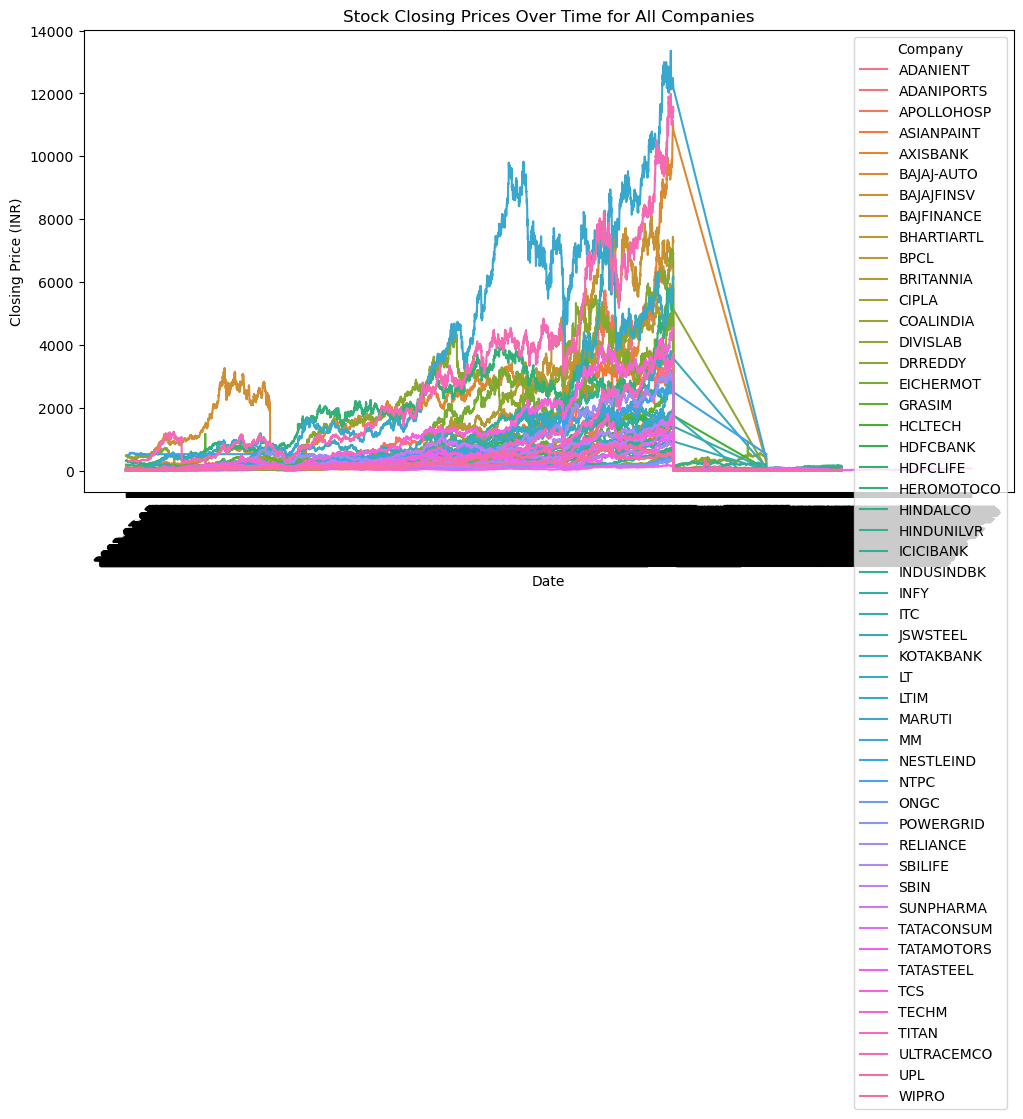

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Close' column is numeric by converting invalid data to NaN
stock_data['Close'] = pd.to_numeric(stock_data['Close'], errors='coerce')

# Drop rows with NaN values in 'Close' column
stock_data_cleaned = stock_data.dropna(subset=['Close'])

# Plot the closing prices for all companies over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', hue='Company', data=stock_data_cleaned)
plt.title('Stock Closing Prices Over Time for All Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()
